In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('feature_time_final.csv')

In [27]:
train_data, test_data = train_test_split(df, test_size = 750, stratify = df['fault'],
                                         random_state = 1288)

In [28]:
train_data

,Unnamed: 0,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor,fault
3647,3647,3.538987,-3.921264,0.014476,0.666431,0.666263,-0.560687,10.016598,5.311699,46.024533,OR021
1283,1283,0.383852,-0.390111,0.010527,0.147372,0.147675,-0.021402,-0.411388,2.599301,14.028601,B021
1862,1862,0.703242,-0.497339,0.031091,0.172658,0.175352,0.324523,0.869200,4.010467,5.639985,IR014
349,349,0.506727,-0.470636,0.017011,0.165334,0.166126,0.057158,0.044447,3.050252,9.765626,B007
2903,2903,4.687071,-4.730891,0.011463,1.119911,1.119423,0.031470,2.969016,4.187041,97.653493,OR007
...,...,...,...,...,...,...,...,...,...,...,...
1035,1035,0.438510,-0.447689,0.012249,0.148248,0.148681,0.038450,-0.121018,2.949340,12.137753,B021
1673,1673,1.559609,-1.312191,0.018975,0.304190,0.304633,0.097104,4.081576,5.119636,16.054568,IR007
1304,1304,0.487326,-0.490038,0.010448,0.191598,0.191789,0.050280,-0.653760,2.540942,18.355695,B021
3524,3524,0.345258,-0.400542,0.006340,0.142669,0.142741,-0.090789,-0.434324,2.418783,22.513011,OR014


In [29]:
X_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]

In [30]:
X_train

,Unnamed: 0,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor
3647,3647,3.538987,-3.921264,0.014476,0.666431,0.666263,-0.560687,10.016598,5.311699,46.024533
1283,1283,0.383852,-0.390111,0.010527,0.147372,0.147675,-0.021402,-0.411388,2.599301,14.028601
1862,1862,0.703242,-0.497339,0.031091,0.172658,0.175352,0.324523,0.869200,4.010467,5.639985
349,349,0.506727,-0.470636,0.017011,0.165334,0.166126,0.057158,0.044447,3.050252,9.765626
2903,2903,4.687071,-4.730891,0.011463,1.119911,1.119423,0.031470,2.969016,4.187041,97.653493
...,...,...,...,...,...,...,...,...,...,...
1035,1035,0.438510,-0.447689,0.012249,0.148248,0.148681,0.038450,-0.121018,2.949340,12.137753
1673,1673,1.559609,-1.312191,0.018975,0.304190,0.304633,0.097104,4.081576,5.119636,16.054568
1304,1304,0.487326,-0.490038,0.010448,0.191598,0.191789,0.050280,-0.653760,2.540942,18.355695
3524,3524,0.345258,-0.400542,0.006340,0.142669,0.142741,-0.090789,-0.434324,2.418783,22.513011


In [31]:
y_train

3647    OR021
1283     B021
1862    IR014
349      B007
2903    OR007
        ...  
1035     B021
1673    IR007
1304     B021
3524    OR014
2911    OR007
Name: fault, Length: 3801, dtype: object

In [32]:
test_data

,Unnamed: 0,Max,Min,Mean,Stddev,RMS,skew,kurtosis,crest_factor,form_factor,fault
1236,1236,0.536142,-0.542817,0.009619,0.169993,0.170182,-0.008303,0.669727,3.150399,17.692057,B021
2458,2458,2.478977,-2.064249,0.012574,0.657331,0.657130,0.036444,0.855251,3.772430,52.259451,IR021
2037,2037,0.805464,-0.921454,0.029354,0.215751,0.217634,-0.116876,1.135915,3.701006,7.414147,IR014
2386,2386,2.286633,-1.985810,0.010057,0.564010,0.563824,0.046207,1.018262,4.055581,56.060928,IR021
3586,3586,0.414102,-0.473974,0.009695,0.147196,0.147444,-0.251901,0.391675,2.808541,15.208356,OR014
...,...,...,...,...,...,...,...,...,...,...,...
2572,2572,2.407004,-2.446850,0.015207,0.723924,0.723730,0.045434,0.768867,3.325832,47.593417,IR021
2138,2138,0.651089,-0.731823,0.028575,0.199007,0.200952,-0.207212,0.318896,3.240026,7.032477,IR014
52,52,0.332950,-0.342546,0.017227,0.119245,0.120425,-0.059051,-0.001503,2.764785,6.990555,B007
834,834,0.393866,-0.312923,0.006617,0.112715,0.112855,0.161175,0.036898,3.490032,17.056238,B014


In [33]:
X_test=test_data.iloc[:,:-1]
y_test=test_data.iloc[:,-1]

In [34]:
y_test

1236     B021
2458    IR021
2037    IR014
2386    IR021
3586    OR014
        ...  
2572    IR021
2138    IR014
52       B007
834      B014
1374    IR007
Name: fault, Length: 750, dtype: object

### Model building

In [35]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [36]:

model.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [38]:
overall_train_accuracy = accuracy_score(y_train, train_predictions)
print("Overall train accuracy: ", overall_train_accuracy)

Overall train accuracy:  1.0


In [39]:

test_confu_matrix = confusion_matrix(y_test, test_predictions)

In [40]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']


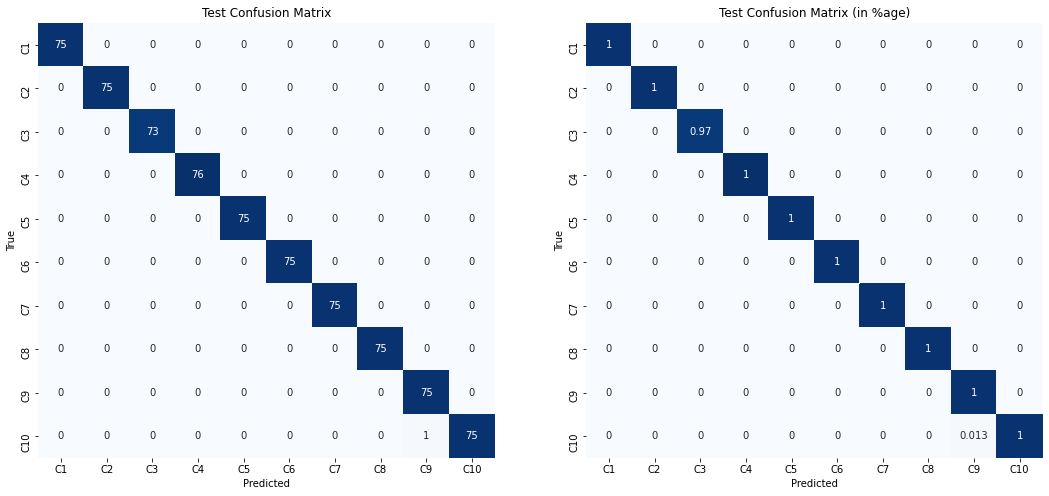

In [41]:
plt.figure(2,figsize=(18,8))


plt.subplot(121)
sns.heatmap(test_confu_matrix, annot = True,xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(122)
sns.heatmap(test_confu_matrix/75, annot = True,xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [42]:
overall_test_accuracy = accuracy_score(y_test, test_predictions)
print("Overall test accuracy: ", overall_test_accuracy)

Overall test accuracy:  0.9986666666666667


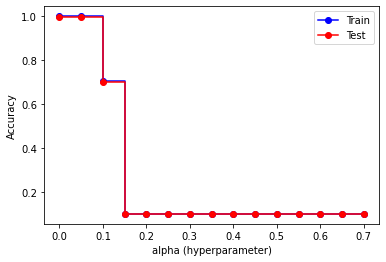

In [43]:
ccp_alphas = np.linspace(0, 0.7, num = 15)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
plt.figure()
plt.plot(ccp_alphas, train_scores,'-o', color = "blue", label = "Train", drawstyle = "steps-post")
plt.plot(ccp_alphas, test_scores, '-o', color = "red", label = "Test", drawstyle = "steps-post")
plt.xlabel("alpha (hyperparameter)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import auc, precision_recall_curve

In [45]:
from sklearn import metrics



# Print the confusion matrix
print(metrics.confusion_matrix(y_test, test_predictions))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, test_predictions, digits=3))

[[75  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0]
 [ 0  0 73  0  0  0  0  0  0  0]
 [ 0  0  0 76  0  0  0  0  0  0]
 [ 0  0  0  0 75  0  0  0  0  0]
 [ 0  0  0  0  0 75  0  0  0  0]
 [ 0  0  0  0  0  0 75  0  0  0]
 [ 0  0  0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0  0  1 75]]
              precision    recall  f1-score   support

        B007      1.000     1.000     1.000        75
        B014      1.000     1.000     1.000        75
        B021      1.000     1.000     1.000        73
       IR007      1.000     1.000     1.000        76
       IR014      1.000     1.000     1.000        75
       IR021      1.000     1.000     1.000        75
      Normal      1.000     1.000     1.000        75
       OR007      1.000     1.000     1.000        75
       OR014      0.987     1.000     0.993        75
       OR021      1.000     0.987     0.993        76

    accuracy                          0.999       750
   macro avg      0